<a href="https://colab.research.google.com/github/ketanpandey01/FIFA-19_Regression/blob/master/FIFA'19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Market Value Prediction

###Welcome to FIFA'19! Our task is to predict the market value of a football player, given FIFA'19 video game dataset.

#Import the dependencies

In [0]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For Missing Values
from sklearn.impute import SimpleImputer


#Get the data

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
fifa_raw_dataset = pd.read_csv('/content/drive/My Drive/FIFA_data.csv')

#Take a look at the data and the datastructure.

In [182]:
fifa_raw_dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [183]:
fifa_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [184]:
fifa_raw_dataset.shape

(18207, 89)

#Feature Selection
###`Based on my intuition and football knowledge, I selected below features which could be best used to predict a player's market value.`

In [185]:
features = ['International Reputation', 'Overall', 'Potential', 'Reactions', 'Composure', 'Value']
fifa_dataset = fifa_raw_dataset[[*features]]
fifa_dataset.head()

,International Reputation,Overall,Potential,Reactions,Composure,Value
0,5.0,94,94,95.0,96.0,€110.5M
1,5.0,94,94,96.0,95.0,€77M
2,5.0,92,93,94.0,94.0,€118.5M
3,4.0,91,93,90.0,68.0,€72M
4,4.0,91,92,91.0,88.0,€102M


In [186]:
fifa_dataset.shape

(18207, 6)

###For the purpose of exploring and visualizing the dataset, we need to first parse and convert the 'Value' feature (which is our output label) to number form.

In [0]:
#parse string for millions and thousands to numeric values
def parseValue(x):
    x = str(x).replace('€', '')
    if('M' in str(x)):
        x = str(x).replace('M', '')
        x = float(x) * 1000000
    elif('K' in str(x)):
        x = str(x).replace('K', '')
        x = float(x) * 1000
    return float(x)

fifa_dataset['Value'] = fifa_dataset['Value'].apply(parseValue)

In [188]:
fifa_dataset.head()

,International Reputation,Overall,Potential,Reactions,Composure,Value
0,5.0,94,94,95.0,96.0,110500000.0
1,5.0,94,94,96.0,95.0,77000000.0
2,5.0,92,93,94.0,94.0,118500000.0
3,4.0,91,93,90.0,68.0,72000000.0
4,4.0,91,92,91.0,88.0,102000000.0


In [189]:
fifa_dataset.describe()

,International Reputation,Overall,Potential,Reactions,Composure,Value
count,18159.000000,18207.000000,18207.000000,18159.000000,18159.000000,1.820700e+04
mean,1.113222,66.238699,71.307299,61.836610,58.648274,2.410696e+06
std,0.394031,6.908930,6.136496,9.010464,11.436133,5.594933e+06
min,1.000000,46.000000,48.000000,21.000000,3.000000,0.000000e+00
25%,1.000000,62.000000,67.000000,56.000000,51.000000,3.000000e+05
50%,1.000000,66.000000,71.000000,62.000000,60.000000,6.750000e+05
75%,1.000000,71.000000,75.000000,68.000000,67.000000,2.000000e+06
max,5.000000,94.000000,95.000000,96.000000,96.000000,1.185000e+08


# Discover and visualize the data to gain insights

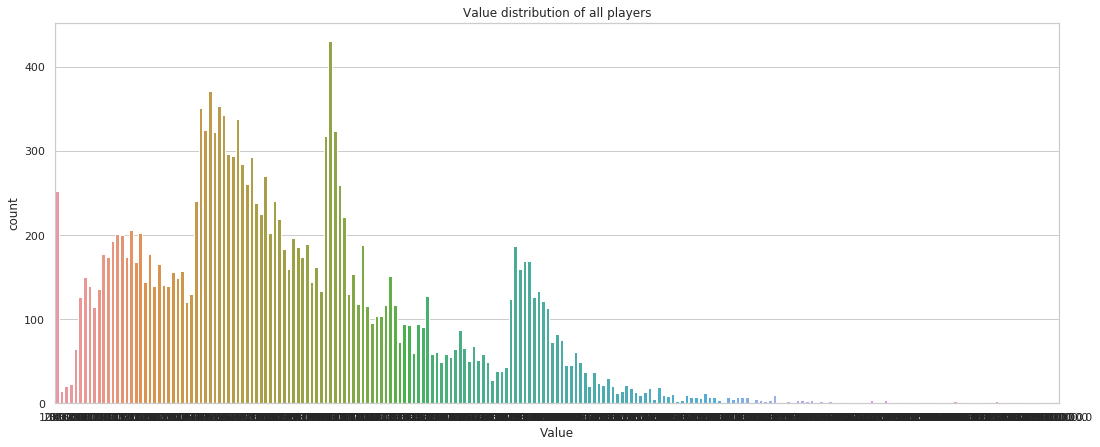

In [190]:
# Value ditribution
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'Value', data=fifa_dataset)
plt.title('Value distribution of all players')
plt.show()

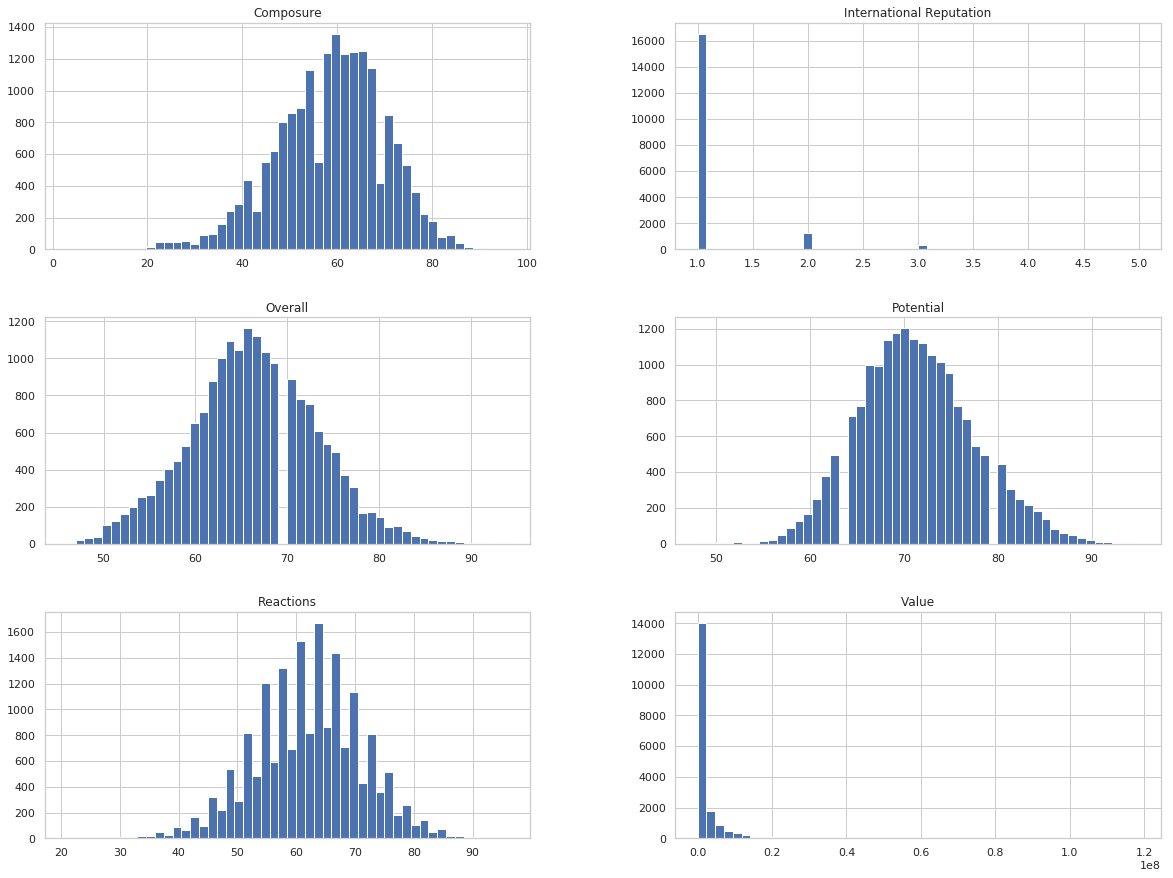

In [191]:
%matplotlib inline
fifa_dataset.hist(bins=50, figsize=(20,15))
plt.show()

##Find Correlations

In [192]:
corr_matrix = fifa_dataset.corr()
corr_matrix.shape

(6, 6)

In [193]:

corr_matrix["Value"].sort_values(ascending=False)

Value                       1.000000
International Reputation    0.653176
Overall                     0.627085
Potential                   0.576218
Reactions                   0.540552
Composure                   0.450352
Name: Value, dtype: float64

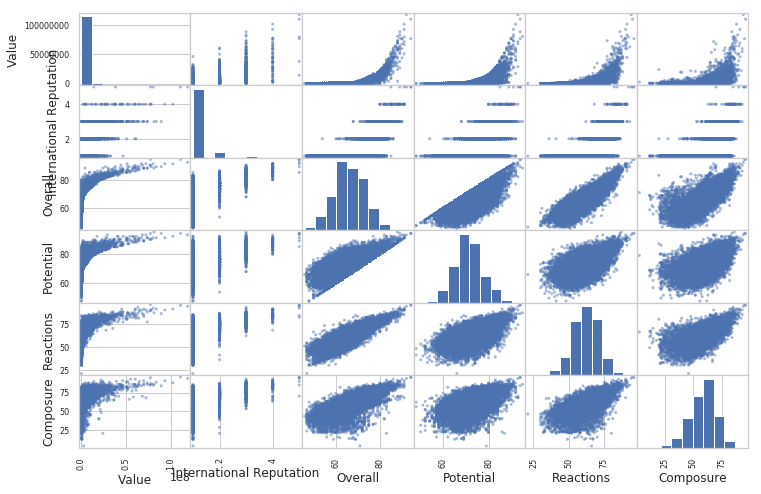

In [194]:
attributes = ["Value", "International Reputation", "Overall",
              "Potential", "Reactions", "Composure"]
scatter_matrix(fifa_dataset[attributes], figsize=(12, 8))
plt.show()

#Creating Test Set

In [0]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [0]:
#Split the dataset into TRAIN and TEST set. Giving 20% of data to test set.
train_set, test_set = train_test_split(fifa_dataset, test_size=0.2, random_state=42)

In [197]:
print('Train',' ','Test')
print(len(train_set),'+',len(test_set),'=',len(train_set)+len(test_set))

Train   Test
14565 + 3642 = 18207


# Prepare the data for Machine Learning algorithms

##Data Cleaning

In [198]:
l = list(train_set['Value'] == 0)
print('Zeros in output label: ',len([v for v in l if v==True] ))
print('\nNaN values in following features:')
train_set.isnull().any()



Zeros in output label:  208

NaN values in following features:


International Reputation     True
Overall                     False
Potential                   False
Reactions                    True
Composure                    True
Value                       False
dtype: bool

In [0]:
train_set = train_set.replace(0, pd.np.nan)

### *Replace 'NaN' values with the median.*

In [0]:
imputer = SimpleImputer(strategy="median")

In [201]:
imputer.fit(train_set)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [202]:
imputer.statistics_

array([1.0e+00, 6.6e+01, 7.1e+01, 6.2e+01, 6.0e+01, 7.0e+05])

In [0]:
tf = imputer.transform(train_set)

In [0]:
fifa_dataset_tf = pd.DataFrame(tf, columns=fifa_dataset.columns)

In [205]:
fifa_dataset_tf.head()

,International Reputation,Overall,Potential,Reactions,Composure,Value
0,1.0,54.0,66.0,47.0,42.0,100000.0
1,1.0,69.0,80.0,70.0,70.0,1600000.0
2,1.0,65.0,65.0,59.0,52.0,400000.0
3,3.0,83.0,89.0,70.0,72.0,35000000.0
4,1.0,72.0,83.0,64.0,67.0,5500000.0


In [207]:
# No NULL value present after imputation.
fifa_dataset_tf.isnull().any()

International Reputation    False
Overall                     False
Potential                   False
Reactions                   False
Composure                   False
Value                       False
dtype: bool

##Seperate the Features and Label

In [0]:
fifa_dataset_features = fifa_dataset_tf.drop("Value", axis=1) # drop labels for training set
fifa_dataset_labels = fifa_dataset_tf["Value"].copy()

# Select and train a model 
###`Before directly training on the test set, first train and evaluate on the training set. `
###`Also, try different ML algorithms and choose which fits best on the data.`

##Linear Regression

In [209]:
lin_reg = LinearRegression()
lin_reg.fit(fifa_dataset_features, fifa_dataset_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [213]:
fifa_dataset_predictions = lin_reg.predict(fifa_dataset_features)
lin_mse = mean_squared_error(fifa_dataset_labels, fifa_dataset_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3623613.6330418903

In [214]:
score = r2_score(fifa_dataset_labels, fifa_dataset_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 58.38 %


##Decision Trees

In [215]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(fifa_dataset_features, fifa_dataset_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [216]:
fifa_dataset_predictions = tree_reg.predict(fifa_dataset_features)
tree_mse = mean_squared_error(fifa_dataset_labels, fifa_dataset_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

290071.64089949714

In [217]:
score = r2_score(fifa_dataset_labels, fifa_dataset_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 99.73 %


##Random Forest

In [218]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(fifa_dataset_features, fifa_dataset_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [219]:
fifa_dataset_predictions = forest_reg.predict(fifa_dataset_features)
forest_mse = mean_squared_error(fifa_dataset_labels, fifa_dataset_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

549450.5604146039

In [220]:
score = r2_score(fifa_dataset_labels, fifa_dataset_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 99.04 %


##Evaluation using Cross-Validation

In [0]:
scores = cross_val_score(tree_reg, fifa_dataset_features, fifa_dataset_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [222]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2155951.11748813 1234189.49835356 1693858.33123115 1597052.78625811
 1753147.1346397  1623110.49887258 2001996.2681026  1801268.17425133
 1614963.97567008 1627464.88382209]
Mean: 1710300.2668689345
Standard deviation: 236036.39757470996


In [223]:
lin_scores = cross_val_score(lin_reg, fifa_dataset_features, fifa_dataset_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4417475.90050168 2900261.62095839 3478483.64803492 3570553.48178237
 3846547.46276483 3319064.39232194 3988251.76117373 3385779.62696229
 3736946.69941324 3454241.81213971]
Mean: 3609760.6406053104
Standard deviation: 393563.38502574514


In [224]:
forest_scores = cross_val_score(forest_reg, fifa_dataset_features, fifa_dataset_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1605397.90054926 1001137.56365965 1116074.00451624 1418538.47193818
 1399719.4641721  1313974.57235987 1597414.51247327 1276012.94070175
 1035097.07210787 1319974.38011964]
Mean: 1308334.088259783
Standard deviation: 199878.6564158338


#Fine-Tune the Model

##Grid Search

In [225]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(fifa_dataset_features, fifa_dataset_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [226]:
grid_search.best_params_

{'max_features': 3, 'n_estimators': 30}

In [227]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [228]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1556181.426818337 {'max_features': 2, 'n_estimators': 3}
1381554.334188145 {'max_features': 2, 'n_estimators': 10}
1349580.3427347215 {'max_features': 2, 'n_estimators': 30}
1460755.722742697 {'max_features': 3, 'n_estimators': 3}
1357892.041584997 {'max_features': 3, 'n_estimators': 10}
1318916.6276779054 {'max_features': 3, 'n_estimators': 30}
1500773.7675300613 {'max_features': 4, 'n_estimators': 3}
1384480.6448976204 {'max_features': 4, 'n_estimators': 10}
1336044.5033546558 {'max_features': 4, 'n_estimators': 30}
1613047.161735568 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1483368.1628806007 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1561636.1846224545 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1463144.3075867803 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
1616279.1216557298 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
1535817.460078731 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}



#Evaluate the model on the Test Set

In [0]:
test_set = test_set.replace(0, pd.np.nan)
tf = imputer.transform(test_set)
fifa_dataset_tf = pd.DataFrame(tf, columns=fifa_dataset.columns)

In [0]:
fifa_dataset_features = fifa_dataset_tf.drop("Value", axis=1)
fifa_dataset_labels = fifa_dataset_tf["Value"].copy()

In [232]:
final_model = grid_search.best_estimator_

final_model.fit(fifa_dataset_features, fifa_dataset_labels)
final_predictions = final_model.predict(fifa_dataset_features)

final_mse = mean_squared_error(fifa_dataset_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

618448.2934420329

In [233]:
final_model_score = r2_score(fifa_dataset_labels, final_predictions)  
print('Accuracy:',format(final_model_score*100,'.2f'),'%')

Accuracy: 98.73 %
